# İMDB Duygu Analizi (RNN)-Sentiment Analysis

## Kütüphane İmport İşlemi



In [36]:
!pip install tensorflow

In [37]:
!pip install keras

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import SimpleRNN, Dense, Activation

## Data İmport İşlemi

In [39]:
(X_train,Y_train),(X_test,Y_test) = imdb.load_data(path="imdb.npz",
               num_words = None,
               skip_top = 0,
               maxlen = None,
               seed=113,
               start_char = 1,
               oov_char = 2,
               index_from = 3)

In [40]:
print("X Type: ",type(X_train))
print("Y Type: ",type(Y_train))

print("X train Shape",X_train.shape)
print("Y train Shape",Y_train.shape)

X Type:  <class 'numpy.ndarray'>
Y Type:  <class 'numpy.ndarray'>
X train Shape (25000,)
Y train Shape (25000,)


## EDA

In [41]:
print("Y train values:",np.unique(Y_train))
print("Y test values:",np.unique(Y_test))

Y train values: [0 1]
Y test values: [0 1]


In [42]:
unique, counts = np.unique(Y_train,return_counts=True)
print("Y train distribution",dict(zip(unique,counts)))

Y train distribution {0: 12500, 1: 12500}


In [43]:
unique, counts = np.unique(Y_test,return_counts=True)
print("Y test distribution",dict(zip(unique,counts)))

Y test distribution {0: 12500, 1: 12500}


Text(0.5, 1.0, 'Y train')

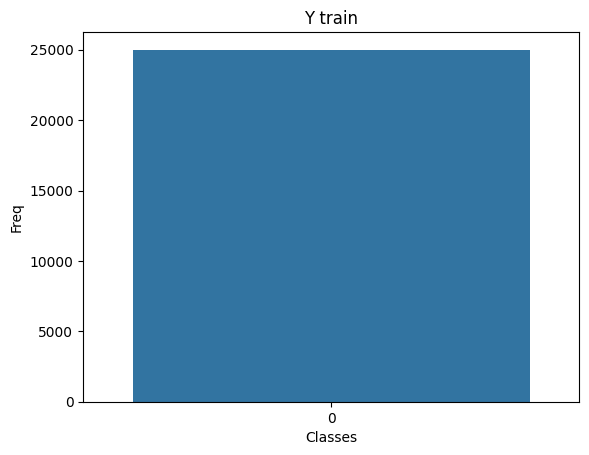

In [44]:
plt.figure()
sns.countplot(Y_train)
plt.xlabel("Classes")
plt.ylabel("Freq")
plt.title("Y train")

Text(0.5, 1.0, 'Y test')

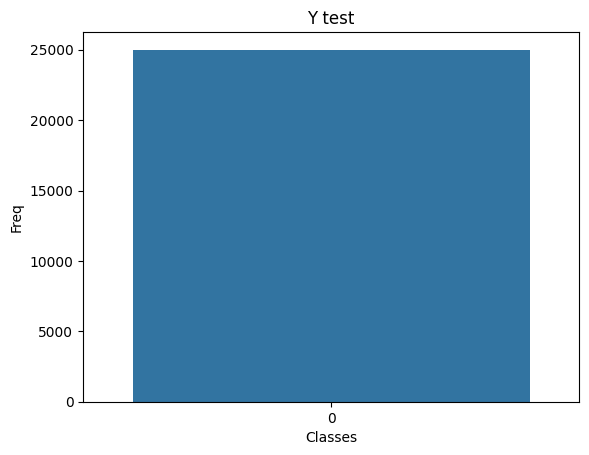

In [45]:
plt.figure()
sns.countplot(Y_test)
plt.xlabel("Classes")
plt.ylabel("Freq")
plt.title("Y test")

In [46]:
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [47]:
len(X_train[0])

218

In [48]:
review_len_train=[]
review_len_test=[]
for i, ii in zip(X_train,X_test):
  review_len_train.append(len(i))
  review_len_test.append(len(ii))

<ipython-input-49-7037aabe6f55>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(review_len_train,hist_kws={"alpha":0.3})
<ipython-input-49-7037aabe6f55>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(review_len_test,hist_kws={"alpha":0.3})


<Axes: ylabel='Density'>

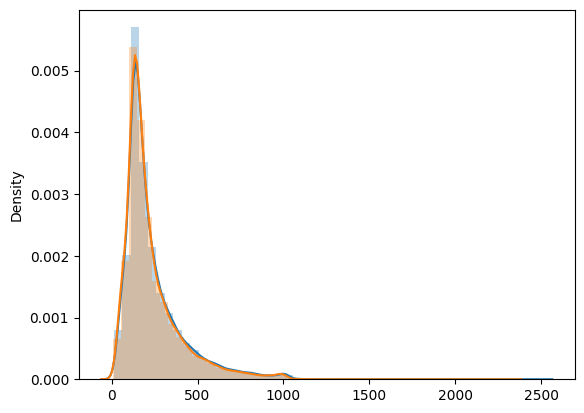

In [49]:
sns.distplot(review_len_train,hist_kws={"alpha":0.3})
sns.distplot(review_len_test,hist_kws={"alpha":0.3})

In [50]:
print("Train mean:",np.mean(review_len_train))
print("Train median:",np.median(review_len_train))
print("Train mode:",stats.mode(review_len_train))

Train mean: 238.71364
Train median: 178.0
Train mode: ModeResult(mode=132, count=196)


In [51]:
# number of words
word_index = imdb.get_word_index()
print(type(word_index))

<class 'dict'>


In [52]:
print(len(word_index))

88584


In [53]:
for keys,values in word_index.items():
  if values == 22:
    print(keys)

you


In [54]:
def whatITSay(index=24):

  reverse_index = dict([(value,key) for (key,value) in word_index.items()])
  decode_review = " ".join([reverse_index.get(i - 3,"!")for i in X_train[index]])
  print(decode_review)
  print(Y_train[index])
  return decode_review

decoded_review = whatITSay(36)


! sorry i just didn't find the subject matter as compelling as the filmmaker did the robot guy and the mole rat guy were pretty interesting although morris didn't really tell us much about them the other two subjects were a bore and the supposed connections between them didn't hold up
0


## Preprocess

In [55]:
num_words = 1500
(X_train,Y_train),(X_test,Y_test) = imdb.load_data(num_words=num_words)

In [56]:
maxlen = 130
X_train = pad_sequences(X_train,maxlen = maxlen)
X_test = pad_sequences(X_test,maxlen=maxlen)

In [57]:
print(X_train[5])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    1  778  128   74   12  630  163   15    4    2    2
 1051    2   32   85  156   45   40  148  139  121  664  665   10   10
 1361  173    4  749    2   16    2    8    4  226   65   12   43  127
   24    2   10   10]


In [58]:
for i in X_train[0:10]:
  print(len(i))

130
130
130
130
130
130
130
130
130
130


In [59]:
decoded_review = whatITSay(5)

! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! begins better than it ends funny that the ! ! crew ! all other actors it's like those scenes where documentary shots br br spoiler part the message ! was ! to the whole story it just does not ! br br
0


## RNN

In [60]:
rnn = Sequential()
rnn.add(Embedding(num_words,32,input_length=len(X_train[0])))
rnn.add(SimpleRNN(166,input_shape=(num_words,maxlen),return_sequences=False,activation="relu"))
rnn.add(Dense(1))
rnn.add(Activation("sigmoid"))

print(rnn.summary())
rnn.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 130, 32)           48000     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 166)               33034     
                                                                 
 dense_1 (Dense)             (None, 1)                 167       
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 81201 (317.19 KB)
Trainable params: 81201 (317.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [61]:
history = rnn.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=5,batch_size=120,verbose=1)

Epoch 1/5
209/209 [==============================] - 69s 288ms/step - loss: 3.1765 - accuracy: 0.5793 - val_loss: 0.6453 - val_accuracy: 0.6906
Epoch 2/5
209/209 [==============================] - 41s 197ms/step - loss: 0.6418 - accuracy: 0.6836 - val_loss: 0.5618 - val_accuracy: 0.7197
Epoch 3/5
209/209 [==============================] - 44s 208ms/step - loss: 75.7665 - accuracy: 0.7809 - val_loss: 0.4869 - val_accuracy: 0.7795
Epoch 4/5
209/209 [==============================] - 52s 251ms/step - loss: 928.6285 - accuracy: 0.8069 - val_loss: 0.5142 - val_accuracy: 0.7527
Epoch 5/5
209/209 [==============================] - 45s 214ms/step - loss: 0.8713 - accuracy: 0.7686 - val_loss: 0.5819 - val_accuracy: 0.6787


In [62]:
score = rnn.evaluate(X_test,Y_test)
print("Accuracy: %",score[1]*100)

782/782 [==============================] - 13s 17ms/step - loss: 0.5819 - accuracy: 0.6787
Accuracy: % 67.87199974060059


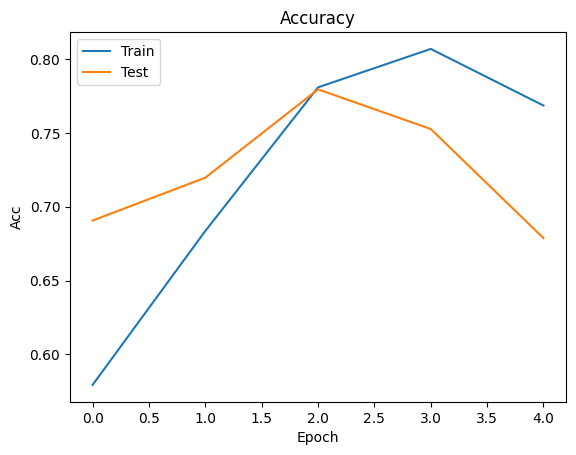

In [63]:
plt.figure()
plt.plot(history.history["accuracy"],label="Train")
plt.plot(history.history["val_accuracy"],label="Test")
plt.title("Accuracy")
plt.ylabel("Acc")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [63]:
plt.figure()
plt.plot(history.history["loss"],label="Train")
plt.plot(history.history["val_loss"],label="Test")
plt.title("Accuracy")
plt.ylabel("Acc")
plt.xlabel("Epoch")
plt.legend()
plt.show()

##